In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import ElasticNet 
from sklearn.linear_model import BayesianRidge 
from sklearn.metrics import r2_score as r2 
from sklearn.ensemble import RandomForestRegressor

In [28]:
df=pd.read_excel(r'C:\Users\Shubham\Desktop\DS-assignment\DS - Assignment Part 1 data set.xlsx')

In [29]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [30]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [33]:
df.drop(columns='Transaction date',inplace=True)

In [34]:
# showing correlation between 'House price of unit area' with other columns
corr= df.corr()
print(corr['House price of unit area'].sort_values(ascending=False))

House price of unit area                    1.000000
Number of convenience stores                0.571005
latitude                                    0.546307
longitude                                   0.523287
Number of bedrooms                          0.050265
House size (sqft)                           0.046489
House Age                                  -0.210567
Distance from nearest Metro station (km)   -0.673613
Name: House price of unit area, dtype: float64


<AxesSubplot:xlabel='Number of convenience stores', ylabel='Density'>

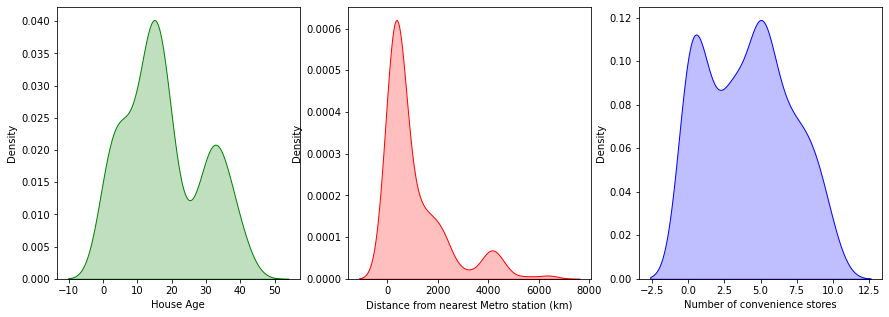

In [55]:
# Checking the distribution

%matplotlib inline

plt.figure(figsize = (20,5))

plt.subplot(1,4,1)
sns.kdeplot(df['House Age'], shade = True, color = "g")

plt.subplot(1,4,2)
sns.kdeplot(df["Distance from nearest Metro station (km)"], shade = True, color = "r")

plt.subplot(1,4,3)
sns.kdeplot(df['Number of convenience stores'], shade = True, color = "b")

<AxesSubplot:xlabel='Number of bedrooms', ylabel='Density'>

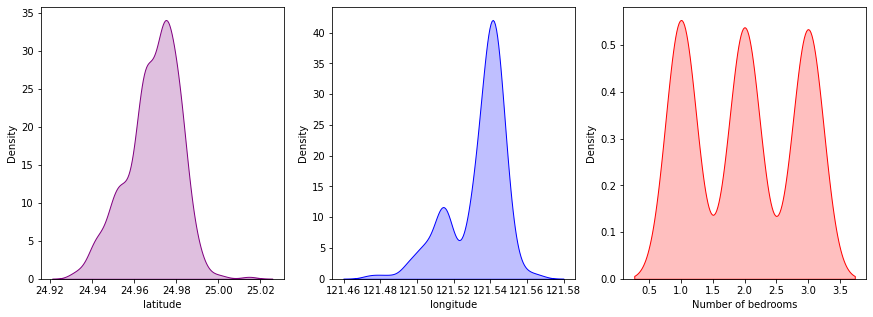

In [44]:
plt.figure(figsize = (20,5))

plt.subplot(1,4,1)
sns.kdeplot(df.latitude, shade = True, color = "purple")

plt.subplot(1,4,2)
sns.kdeplot(df.longitude, shade = True, color = "b")

plt.subplot(1,4,3)
sns.kdeplot(df['Number of bedrooms'], shade = True, color = "r")

<AxesSubplot:xlabel='House price of unit area', ylabel='Density'>

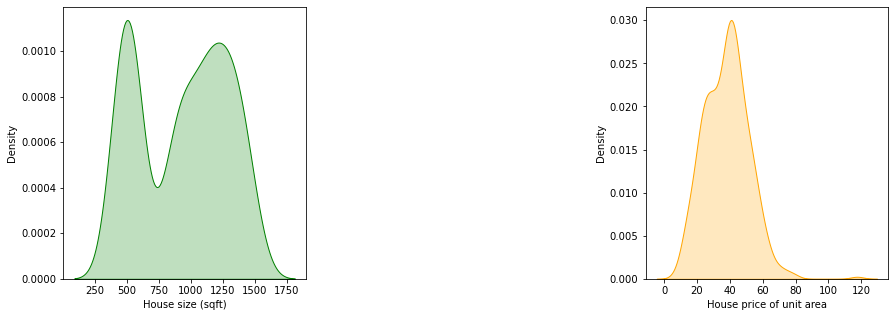

In [47]:
plt.figure(figsize = (20,5))

plt.subplot(1,4,1)
sns.kdeplot(df['House size (sqft)'], shade = True, color = "g")

plt.subplot(1,4,3)
sns.kdeplot(df['House price of unit area'], shade = True, color = "orange")

In [48]:
# Dividing data into test and train

from sklearn.model_selection import train_test_split

X_var = df[['House Age', 'Distance from nearest Metro station (km)', 'Number of convenience stores', 'latitude','longitude','Number of bedrooms','House size (sqft)']].values
y_var = df['House price of unit area'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 100)


Checking different models for prediction

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)



bs = BayesianRidge()
bs.fit(X_train, y_train)
bs_yhat = bs.predict(X_test)



en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)


RFR = RandomForestRegressor(n_estimators=50)
RFR.fit(X_train, y_train)
RFR_yhat = RFR.predict(X_test) 

In [54]:
# Finding Scores

print('Score of linear regression model is:',(r2(y_test, lr_yhat)))

print('Score of bayesian ridge model is:',(r2(y_test, bs_yhat)))

print('Score of elastic net model is:',(r2(y_test, en_yhat)))

print('Score of random fores regressor model is:',(r2(y_test, RFR_yhat)))

Score of linear regression model is: 0.6706304461257995
Score of bayesian ridge model is: 0.639153931657249
Score of elastic net model is: 0.6466951999153748
Score of random fores regressor model is: 0.8370383173986403


In [19]:
# Best model is Random Forest